# Classification.

In [1]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784',version=1,data_home='datasets/mnist_784',as_frame=True)
print(mnist.keys())

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])


In [2]:
X,y = mnist['data'],mnist['target']
print(X.shape,y.shape)

(70000, 784) (70000,)


(70000, 784) (70000,)


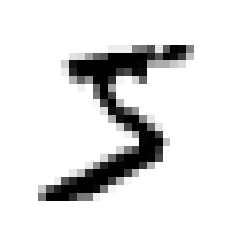

5


In [3]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
print(X.shape,y.shape)
some_digit = X.values[0,:]
some_digit_image = some_digit.reshape(28,28)
plt.imshow(some_digit_image,cmap='binary')
plt.axis('off')
plt.show()
print(y[0])


In [4]:
# convert the string to number.
import numpy as np
y = y.astype(np.uint8)

In [5]:
X_train, X_test, y_train,y_test = X[:60000],X[60000:],y[:60000],y[60000:]

In [6]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test==5)
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train,y_train_5)

SGDClassifier(random_state=42)

In [7]:
sgd_clf.predict([X.values[0,:]])

array([ True])

# Performance measures.

In [8]:
from sklearn.model_selection import cross_val_score
print(cross_val_score(sgd_clf,X_train,y_train_5,cv=3,scoring='accuracy'))


[0.95035 0.96035 0.9604 ]


In [9]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf,X_train,y_train_5,cv=3)

In [10]:
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_train_5,y_train_pred)
print(cf_matrix)

[[53892   687]
 [ 1891  3530]]


In [11]:
from sklearn.metrics import precision_score, recall_score
pr_score= precision_score(y_true=y_train_5,y_pred=y_train_pred)
rc_score = recall_score(y_true = y_train_5,y_pred = y_train_pred)
print(pr_score,rc_score)

0.8370879772350012 0.6511713705958311


In [12]:
from sklearn.metrics import f1_score
f1 = f1_score(y_true=y_train_5,y_pred = y_train_pred)
print(f1)

0.7325171197343846


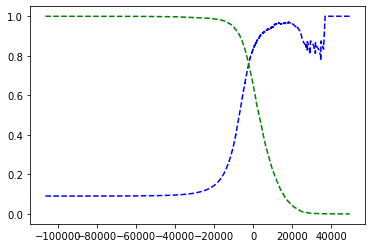

In [17]:
from sklearn.metrics import precision_recall_curve
y_scores = cross_val_predict(estimator = sgd_clf, X=X_train,y=y_train_5,cv=3,method='decision_function')
precisions,recalls,thresholds = precision_recall_curve(y_true=y_train_5,probas_pred=y_scores)
def plot_precision_recall(precisions, recalls, thresholds):
    plt.plot(thresholds,precisions[:-1],'b--',label='Precision')
    plt.plot(thresholds,recalls[:-1],'g--',label='Recall')
    [...]
    
plot_precision_recall(precisions=precisions, recalls=recalls,thresholds=thresholds)
plt.show()

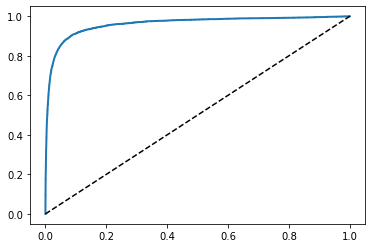

In [20]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train_5,y_scores)
plt.plot(fpr,tpr,linewidth=2,label='FPR vs TPR')
plt.plot([0,1],[0,1],'k--')
[...]
plt.show()


In [21]:
from sklearn.metrics import roc_auc_score
print(roc_auc_score(y_train_5,y_scores))

0.9604938554008616


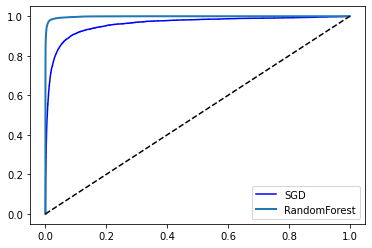

In [24]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(random_state=42)
y_probas_forest = cross_val_predict(forest_clf,X_train,y_train_5,cv=3,method='predict_proba')
y_scores_forest = y_probas_forest[:,1]
fpr_forest,tpr_forest,thresholds_forest= roc_curve(y_true=y_train_5,y_score=y_scores_forest)
plt.plot(fpr,tpr,'b',label='SGD')
plt.plot(fpr_forest,tpr_forest,linewidth=2,label='RandomForest')
plt.plot([0,1],[0,1],'k--')
plt.legend(loc='lower right')
plt.show()